In [1]:
from mylibs import stats as st
from mylibs import resample as rs
from mylibs import linear_model as lm
from mylibs import metrics as me
from mylibs import transform as tm
from mylibs import dist_metrics as dm
import numpy as np
import pandas as pd
import importlib 
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt


In [2]:
importlib.reload(st)
importlib.reload(rs)
importlib.reload(lm)
importlib.reload(me);
importlib.reload(dm);

In [3]:
X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

In [4]:
y = np.array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1])


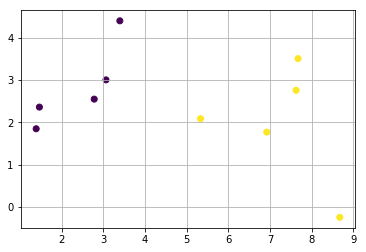

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

In [6]:
# Locate the most similar neighbors
def get_neighbors(X_train, test_row, k):
    distances = dm.euclidean_distance(X_train, test_row)
    distances2 = dm.manhattan_distance(X_train, test_row)
    distances3 = dm.minkowski_distance(X_train, test_row,2)
    distances4 = dm.chebyshev_distance(X_train,test_row)
    
    idx_sort = np.argsort(distances)
    idx_sort2 = np.argsort(distances2)
    idx_sort3 = np.argsort(distances3)
    idx_sort4 = np.argsort(distances4)
    return idx_sort[1:k+1],idx_sort2[1:k+1],idx_sort3[1:k+1],idx_sort4[1:k+1]

In [7]:
get_neighbors(X, X[0], 3)


(array([4, 1, 3]), array([4, 1, 3]), array([4, 1, 3]), array([4, 1, 3]))

In [8]:
def predict_classification(X, y, test_row, k):
    idx_sort,idx_sort2,idx_sort3,idx_sort4 = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    output_values2 = y[idx_sort2]
    output_values3 = y[idx_sort3]
    output_values4 = y[idx_sort4]    
    counts = np.unique(output_values, return_counts=True)
    counts2 = np.unique(output_values2, return_counts=True)
    counts3 = np.unique(output_values3, return_counts=True)
    counts4 = np.unique(output_values4, return_counts=True)
    idx_max = np.argmax(counts[1])
    idx_max2 = np.argmax(counts[1])
    idx_max3 = np.argmax(counts[1])
    idx_max4 = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    prediction2 = counts[0][idx_max2]
    prediction3 = counts[0][idx_max3]
    prediction4 = counts[0][idx_max4]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    print('idx_sort2:{}, output_values2:{}, prediction2:{}'.format(idx_sort2, output_values2, prediction2))
    print('idx_sort3:{}, output_values3:{}, prediction3:{}'.format(idx_sort3, output_values3, prediction3))
    print('idx_sort4:{}, output_values4:{}, prediction4:{}'.format(idx_sort4, output_values4, prediction4))
    
    return prediction,prediction2,prediction3,prediction4

In [9]:
def predict_regression(X, y, test_row, k):
    idx_sort,idx_sort2,idx_sort3,idx_sort4 = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    output_values2 = y[idx_sort2]
    output_values3 = y[idx_sort3]
    output_values4 = y[idx_sort4]
    prediction = np.sum(output_values) / output_values.shape[0]
    prediction2 = np.sum(output_values2) / output_values2.shape[0]
    prediction3 = np.sum(output_values3) / output_values3.shape[0]
    prediction4 = np.sum(output_values4) / output_values4.shape[0]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    print('idx_sort2:{}, output_values2:{}, prediction2:{}'.format(idx_sort2, output_values2, prediction2))
    print('idx_sort3:{}, output_values3:{}, prediction3:{}'.format(idx_sort3, output_values3, prediction3))
    print('idx_sort4:{}, output_values4:{}, prediction4:{}'.format(idx_sort4, output_values4, prediction4))
    return prediction,prediction2,prediction3,prediction4

In [10]:
predict_classification(X, y, np.array([[4.0, 2.5]]), 3)


idx_sort:[0 6 2], output_values:[0 1 0], prediction:0
idx_sort2:[4 6 2], output_values2:[0 1 0], prediction2:0
idx_sort3:[0 6 2], output_values3:[0 1 0], prediction3:0
idx_sort4:[4 6 2], output_values4:[0 1 0], prediction4:0


(0, 0, 0, 0)

In [11]:
predict_regression(X, y, np.array([[4.0, 2.5]]), 3)


idx_sort:[0 6 2], output_values:[0 1 0], prediction:0.3333333333333333
idx_sort2:[4 6 2], output_values2:[0 1 0], prediction2:0.3333333333333333
idx_sort3:[0 6 2], output_values3:[0 1 0], prediction3:0.3333333333333333
idx_sort4:[4 6 2], output_values4:[0 1 0], prediction4:0.3333333333333333


(0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331,
 0.33333333333333331)

In [12]:
predict_classification(X, y, X[6], 5)


idx_sort:[7 5 4 0 9], output_values:[1 1 0 0 1], prediction:1
idx_sort2:[7 5 0 4 9], output_values2:[1 1 0 0 1], prediction2:1
idx_sort3:[7 5 4 0 9], output_values3:[1 1 0 0 1], prediction3:1
idx_sort4:[7 5 0 4 9], output_values4:[1 1 0 0 1], prediction4:1


(1, 1, 1, 1)

In [13]:
predict_regression(X, y, X[6], 5)


idx_sort:[7 5 4 0 9], output_values:[1 1 0 0 1], prediction:0.6
idx_sort2:[7 5 0 4 9], output_values2:[1 1 0 0 1], prediction2:0.6
idx_sort3:[7 5 4 0 9], output_values3:[1 1 0 0 1], prediction3:0.6
idx_sort4:[7 5 0 4 9], output_values4:[1 1 0 0 1], prediction4:0.6


(0.59999999999999998,
 0.59999999999999998,
 0.59999999999999998,
 0.59999999999999998)